## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt

## Models creation

In [2]:
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input, InputLayer,Reshape,Conv2D, MaxPooling2D,Dense, Flatten
from keras.layers import Dense,Dropout, Activation

## Load the MNIST dataset

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print("Size of:")
print("Learning set:", format (X_train.shape))
print("Testing set:", format (X_test.shape))

Size of:
Learning set: (60000, 28, 28)
Testing set: (10000, 28, 28)


## Displaying few images with their labels

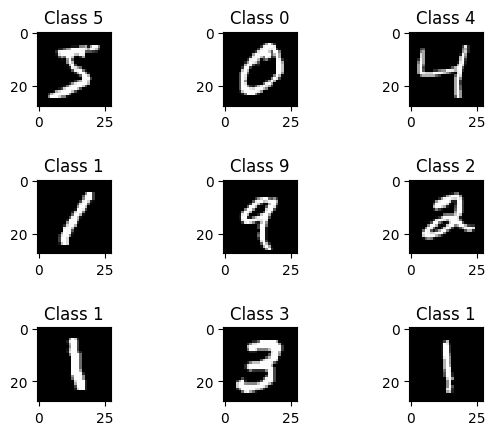

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.title("Class {}".format(y_train[i]))

## Data perparation for training

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
from keras.utils import to_categorical

nb_classes = 10
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print(y_test[1])
print(Y_test[1])


2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Creation of the neural network

In [8]:
img_shape_full = (28,28,1)

# Sequential model
model = Sequential()

# Adding an input layer 
model.add(InputLayer(input_shape=(784,)))

# We are exepecting images of size 28x28x1
model.add(Reshape(img_shape_full))

# Adding a layer: convolutional + actiivation ReLU and max-pooling
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer-conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Adding a layer: convolutional + actiivation ReLU and max-pooling (second layer)
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer-conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())

# Fully connected / dense layer with ReLU 
model.add(Dense(128, activation='relu'))

# Last fully connected / dense layer with softmax-activation for classification
model.add(Dense(nb_classes, activation='softmax'))

In [9]:
inputs = Input(shape=(784,))
net = inputs

# Input is a vector of size 784 elements
# The convolutional layers are waiting for images of size 28x28x1
net = Reshape(img_shape_full)(net)

# 1st convolutional layer
net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer-conv1')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# 2nd convolutional layer
net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer-conv2')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)
net = Flatten()(net)

# 1st dense layer
net = Dense(128, activation='relu')(net)

# 2sec dense layer
net = Dense(nb_classes, activation='softmax')(net)

# Output of the network
outputs = net
model2 = Model(inputs=inputs, outputs=outputs)

In [10]:
# Model1 summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 layer-conv1 (Conv2D)        (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 layer-conv2 (Conv2D)        (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1764)             

In [11]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 layer-conv1 (Conv2D)        (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 layer-conv2 (Conv2D)        (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                        

## Compilation of the model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training

In [13]:
model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 [==============================] - 21s 42ms/step - loss: 0.2021 - accuracy: 0.9396
Epoch 2/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0551 - accuracy: 0.9829
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0393 - accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0295 - accuracy: 0.9905
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0242 - accuracy: 0.9922
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 7/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0142 - accuracy: 0.9952
Epoch 8/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 10/10
469/469 [==============================] - 19s 41ms/step - loss: 0.009

## Evaluation of the model

In [14]:
score = model.evaluate(X_test, Y_test, verbose=1)
for name, value in zip(model.metrics_names, score):
    print(name, value)

313/313 [==============================] - 2s 5ms/step - loss: 0.0259 - accuracy: 0.9918
loss 0.02591414749622345
accuracy 0.9918000102043152


## Display few images with their labels and predictions

313/313 [==============================] - 2s 5ms/step


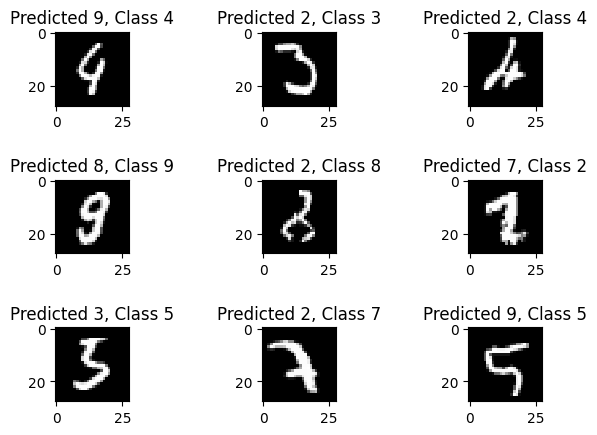

In [18]:
predicted_probs = model.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.subplots_adjust(hspace=1, wspace=1.5)
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## Confusion matrix and classification report

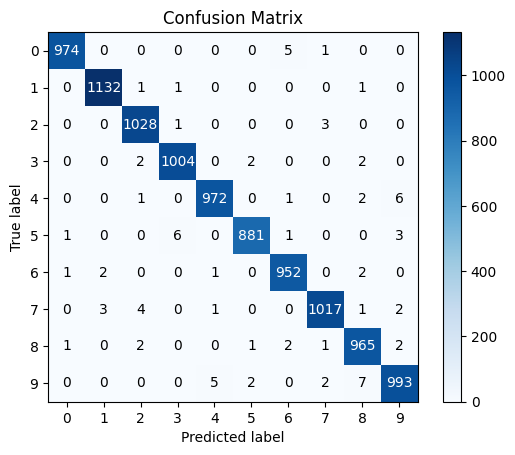

In [19]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predicted_classes, normalize=False)
plt.show()

In [20]:
print(confusion_matrix(y_test, predicted_classes))

[[ 974    0    0    0    0    0    5    1    0    0]
 [   0 1132    1    1    0    0    0    0    1    0]
 [   0    0 1028    1    0    0    0    3    0    0]
 [   0    0    2 1004    0    2    0    0    2    0]
 [   0    0    1    0  972    0    1    0    2    6]
 [   1    0    0    6    0  881    1    0    0    3]
 [   1    2    0    0    1    0  952    0    2    0]
 [   0    3    4    0    1    0    0 1017    1    2]
 [   1    0    2    0    0    1    2    1  965    2]
 [   0    0    0    0    5    2    0    2    7  993]]


In [22]:
print(classification_report(y_test, predicted_classes, target_names=None))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

